<a href="https://colab.research.google.com/github/rgnemasters/Analysis-of-NBA-Referee-Foul-Trends/blob/main/Data_Viz_Exercise_RyanM_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ryan Masters
* Week 4
* Data Visualization Exercise
* Source: https://data.world/akas3006/nba-dat-vis/workspace

##Mount Drive and Import Libraries

In [354]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load File

In [355]:
filename = '/content/NBA Referee Stats.csv'
df = pd.read_csv(filename)
df.value_counts()

Season   Season type     Referee         Games  Total fouls  Shooting  Personal  Loose ball  Personal take  Offensive charge  Offensive  Kicked ball  Technical  Defensive goaltending  Shooting block  Defensive 3 seconds  Delay of game  Personal block  Flagrant 1  Away from play  Double technical  Clear path  Double personal  Inbound foul  Delay technical  Lane violation  Jump ball violation  Flagrant 2  Hanging technical  Unsportsmanlike technical  Taunting technical  Excess timeout technical  Double lane  Too many players technical
2016-17  Playoffs        Bennie Adams    3      48           18        20        0           1              0                 3          0            1          0                      2               0                    0              1               1           1               0                 0           0                0             0                0               0                    0           0                  0                          0       

#Review and Clean Data

In [356]:
#Review file for null values
df.isna().sum()

Season                        0
Season type                   0
Referee                       0
Games                         0
Total fouls                   0
Shooting                      0
Personal                      0
Loose ball                    0
Personal take                 0
Offensive charge              0
Offensive                     0
Kicked ball                   0
Technical                     0
Defensive goaltending         0
Shooting block                0
Defensive 3 seconds           0
Delay of game                 0
Personal block                0
Flagrant 1                    0
Away from play                0
Double technical              0
Clear path                    0
Double personal               0
Inbound foul                  0
Delay technical               0
Lane violation                0
Jump ball violation           0
Flagrant 2                    0
Hanging technical             0
Unsportsmanlike technical     0
Taunting technical            0
Excess t

In [357]:
#Check for duplicates
df.duplicated().any()

False

In [358]:
#Review object/string columns for possible misspellings
df['Season type'].value_counts()

Regular Season    280
Playoffs          141
Name: Season type, dtype: int64

In [359]:
df['Season'].value_counts()

2017-18    107
2019-20    106
2016-17    104
2018-19    104
Name: Season, dtype: int64

In [360]:
referee_counts = df['Referee'].value_counts()
ref_count_index = referee_counts.index
ref_count_index

Index(['Josh Tiven', 'James Capers Jr.', 'Rodney Mott', 'Pat Fraher',
       'Sean Wright', 'Tony Brothers', 'Marc Davis', 'Tony Brown',
       'Zach Zarba', 'Kane Fitzgerald', 'John Goble', 'Scott Foster',
       'Eric Lewis', 'Derrick Collins', 'Brian Forte', 'David Guthrie',
       'Courtney Kirkland', 'Ed Malloy', 'Ken Mauer', 'Sean Corbin',
       'James Williams', 'Mark Lindsay', 'Tom Washington', 'Michael Smith',
       'Kevin Scott', 'Brent Barnaky', 'Kevin Cutler', 'Mark Ayotte',
       'Karl Lane', 'Ben Taylor', 'Gediminas Petraitis', 'Curtis Blair',
       'Mike Callahan', 'Bill Kennedy', 'Leon Wood', 'Tre Maddox',
       'Tyler Ford', 'Nick Buchert', 'Scott Twardoski', 'Scott Wall',
       'Jason Phillips', 'Bennie Adams', 'Dedric Taylor', 'Leroy Richardson',
       'Bill Spooner', 'Matt Boland', 'Ron Garretson', 'Aaron Smith',
       'Eric Dalen', 'Derrick Stafford', 'Phenizee Ransom', 'Mitchell Ervin',
       'Marat Kogut', 'Derek Richardson', 'Justin Van Duyne', 'Brett N

#Sort and Analyze Data

In [361]:
#Setup modified dataframes to analyze data totals to compare playoff and regular season trends by referee.
reg_season = df['Season type'] == 'Regular Season'
playoff_season = df['Season type'] == 'Playoffs'

ref_reg_pivot = df[reg_season].pivot_table(index = 'Referee', aggfunc="sum")
ref_playoff_pivot = df[playoff_season].pivot_table(index = 'Referee', aggfunc = 'sum')

fouls_pergame_playoff = ref_playoff_pivot['Shooting'] / ref_playoff_pivot['Games'] 
ref_playoff_pivot.insert(loc = 0, column = 'Shooting Fouls Per Game', value = fouls_pergame_playoff)

fouls_pergame_reg = ref_reg_pivot['Shooting'] / ref_reg_pivot['Games'] 
ref_reg_pivot.insert(loc = 0, column = 'Shooting Fouls Per Game', value = fouls_pergame_reg)
ref_reg_pivot.sort_values(by='Shooting Fouls Per Game', ascending = False)
ref_playoff_pivot.index

Index(['Ben Taylor', 'Bennie Adams', 'Bill Kennedy', 'Bill Spooner',
       'Brent Barnaky', 'Brian Forte', 'Courtney Kirkland', 'Curtis Blair',
       'Dan Crawford', 'David Guthrie', 'Dedric Taylor', 'Derrick Collins',
       'Derrick Stafford', 'Ed Malloy', 'Eric Lewis', 'Gary Zielinski',
       'Gediminas Petraitis', 'James Capers Jr.', 'James Williams',
       'Jason Phillips', 'John Goble', 'Josh Tiven', 'Kane Fitzgerald',
       'Karl Lane', 'Ken Mauer', 'Kevin Cutler', 'Kevin Scott', 'Leon Wood',
       'Leroy Richardson', 'Marc Davis', 'Mark Ayotte', 'Mark Lindsay',
       'Matt Boland', 'Michael Smith', 'Mike Callahan', 'Monty McCutchen',
       'Nick Buchert', 'Pat Fraher', 'Rodney Mott', 'Ron Garretson',
       'Scott Foster', 'Scott Twardoski', 'Scott Wall', 'Sean Corbin',
       'Sean Wright', 'Tom Washington', 'Tony Brothers', 'Tony Brown',
       'Tre Maddox', 'Tyler Ford', 'Zach Zarba'],
      dtype='object', name='Referee')

In [362]:
#Create top 10 in 'Shooting Fouls Per Game' to analyze in graph, minimum 20 games
min_20_reg = ref_reg_pivot['Games'] >= 20
min_20_playoff = ref_playoff_pivot['Games'] >= 20
ref_playoff_pivot = ref_playoff_pivot[min_20_playoff].sort_values(by="Shooting Fouls Per Game", ascending = False).head(20)
ref_reg_pivot = ref_reg_pivot[min_20_reg].sort_values(by="Shooting Fouls Per Game", ascending = False).head(20)
ref_reg_pivot.index

Index(['Brett Nansel', 'Jenna Schroeder', 'Sean Wright', 'Mitchell Ervin',
       'Ray Acosta', 'Michael Smith', 'Scott Wall', 'Tyler Ford',
       'Scott Foster', 'Ken Mauer', 'Josh Tiven', 'C.J. Washington',
       'Tony Brothers', 'Eric Dalen', 'Sean Corbin', 'Leroy Richardson',
       'Lauren Holtkamp-Sterling', 'Pat Fraher', 'Justin Van Duyne',
       'Dedric Taylor'],
      dtype='object', name='Referee')

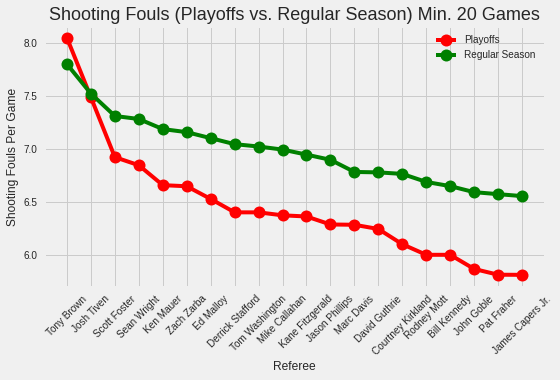

In [370]:
#Plot results in bar graph
plt.style.use('fivethirtyeight')
plt.plot(ref_playoff_pivot.index, ref_playoff_pivot['Shooting Fouls Per Game'].values, marker = "o", 
         markersize = 12, color = 'red', label = "Playoffs")
plt.plot(ref_playoff_pivot.index, ref_reg_pivot['Shooting Fouls Per Game'].values, marker = "o", 
         markersize = 12, color = 'green', label = "Regular Season")
plt.xticks(rotation = 45)
plt.xlabel('Referee', fontsize = 12)
plt.ylabel('Shooting Fouls Per Game', fontsize = 12)
plt.title('Shooting Fouls (Playoffs vs. Regular Season) Min. 20 Games', fontsize = 18)
plt.legend()
plt.tight_layout()